<a href="https://colab.research.google.com/github/AndriiGoz/traffic_signs_classification/blob/master/traffic_signs_classification_lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Traffic Signs with LeNet-5 CNN
some text

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


imports

In [ ]:
import numpy as np
import pandas as pd
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D

read images

In [ ]:
images = []
labels = []
classes = 43

current_path = '/content/gdrive/My Drive/GTSRB/Final_Training/Images/'

for i in range(classes):
    path = os.path.join(current_path, str(str(i).zfill(5)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1.0
            labels.append(label)
        except:
            pass

In [ ]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39209, 32, 32)
Labels shape: (39209, 43)


In [ ]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31367, 32, 32)
y_train shape: (31367, 43)
X_test shape: (7842, 32, 32)
y_test shape: (7842, 43)


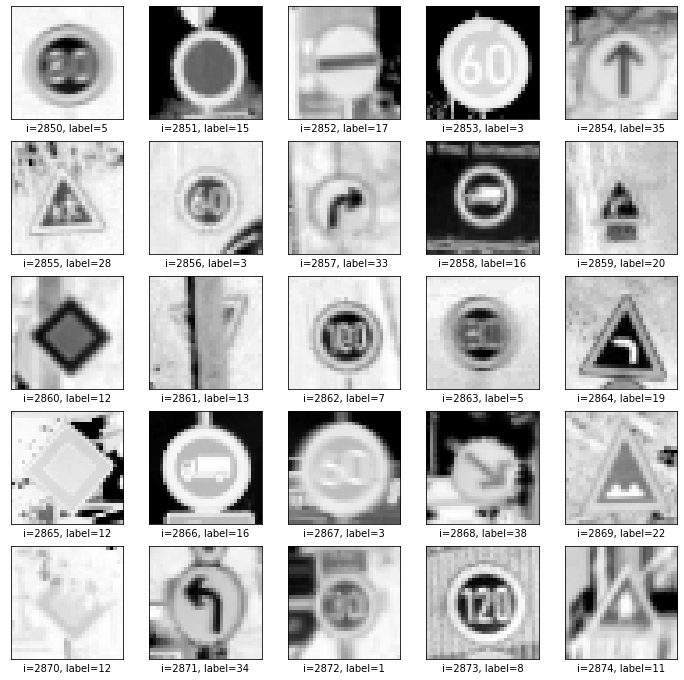

In [ ]:
plt.figure(figsize=(12, 12))
start_index = 2850
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='binary')
plt.show()

In [ ]:
# Building the model
model = Sequential([
    Rescaling(1, input_shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(2, 2),
      activation='relu'),
    AveragePooling2D(),
    Conv2D(filters=16, kernel_size=(2, 2),
      activation='relu'),
    AveragePooling2D(),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=86, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 31, 31, 6)         30        
                                                                 
 average_pooling2d_4 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        400       
                                                                 
 average_pooling2d_5 (Averag  (None, 7, 7, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 784)              

In [ ]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 16s 16ms/step - loss: 2.0616 - accuracy: 0.4301 - val_loss: 0.9233 - val_accuracy: 0.7256
Epoch 2/15
981/981 [==============================] - 16s 17ms/step - loss: 0.7257 - accuracy: 0.7909 - val_loss: 0.5635 - val_accuracy: 0.8319
Epoch 3/15
981/981 [==============================] - 16s 16ms/step - loss: 0.4500 - accuracy: 0.8762 - val_loss: 0.3659 - val_accuracy: 0.9035
Epoch 4/15
981/981 [==============================] - 16s 16ms/step - loss: 0.3168 - accuracy: 0.9132 - val_loss: 0.3260 - val_accuracy: 0.9086
Epoch 5/15
981/981 [==============================] - 16s 16ms/step - loss: 0.2406 - accuracy: 0.9334 - val_loss: 0.2841 - val_accuracy: 0.9161
Epoch 6/15
981/981 [==============================] - 16s 16ms/step - loss: 0.1944 - accuracy: 0.9455 - val_loss: 0.2456 - val_accuracy: 0.9319
Epoch 7/15
981/981 [==============================] - 16s 16ms/step - loss: 0.1534 - accuracy: 0.9584 - val_loss: 0.1970 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

246/246 - 2s - loss: 0.1773 - accuracy: 0.9565 - 2s/epoch - 7ms/step

Test accuracy: 0.9565162062644958


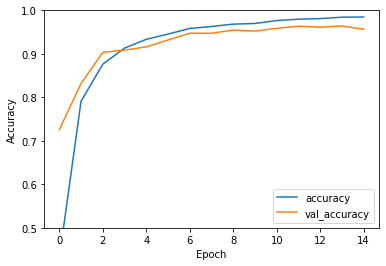

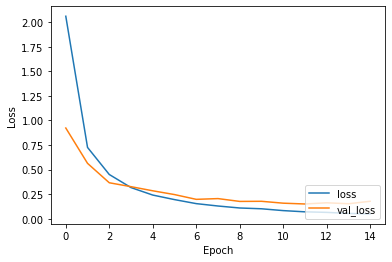

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [ ]:
preds = model.predict(X_test)
print('shape of preds:', preds.shape)

shape of preds: (7842, 43)


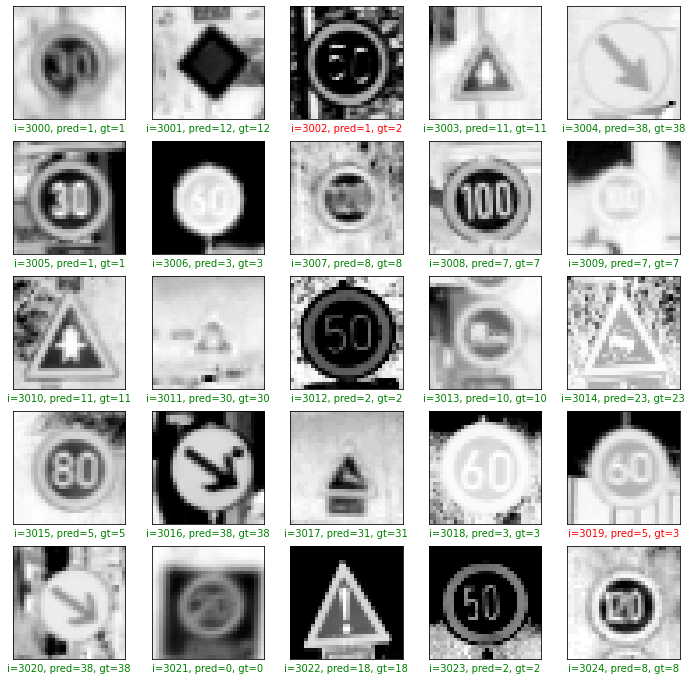

In [ ]:
plt.figure(figsize=(12, 12))
start_index = 3000
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='binary')
plt.show()

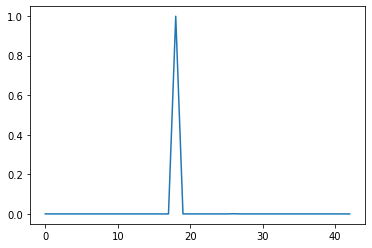

In [ ]:
plt.plot(preds[2018])
plt.show()

Testing

Text(0.5, 0, 'Sample from training set. Label: 38')

<Figure size 432x288 with 0 Axes>

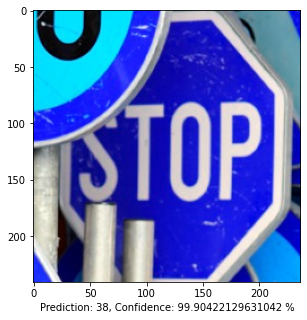

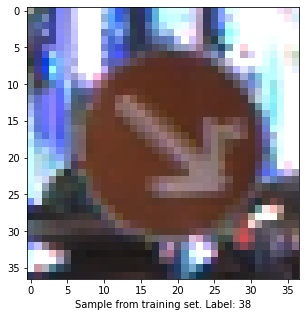

In [ ]:
test_path = '/content/gdrive/My Drive/Traffic_Signs_Test_Folder/'

image_number = 12
test_images = []
test_images_initial = []

test_img_folder = os.listdir(test_path)
for i in test_img_folder:
    try:
        image = cv.imread(str(test_path+'/'+i))
        test_images_initial.append(image)
        image = cv.resize(image, (32, 32))
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = np.array(image)
        test_images.append(image)
    except:
        pass

test_images = np.array(test_images)
test_images = test_images/255

index = image_number
preds_new = model.predict(test_images)
pred = np.argmax(preds_new[index])
confidence = np.max(preds_new[index])

# plot samples from user
plt.figure(0)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(test_images_initial[index], cmap='binary')
plt.xlabel('Prediction: {}, Confidence: {} %'.format(pred, confidence*100))


images = []
current_path = '/content/gdrive/My Drive/GTSRB/Final_Training/Images/'
path = os.path.join(current_path, str(str(pred).zfill(5)))
img_folder = os.listdir(path)
for i in img_folder:
    try:
        image = cv.imread(str(path+'/'+i))
        images.append(image)
    except:
        pass
# plot sample from training set
plt.figure(1)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(images[random.randint(0, len(images))], cmap='binary')
plt.xlabel('Sample from training set. Label: {}'.format(pred))

In [ ]:
model.save('/content/gdrive/My Drive/keras_model/')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/keras_model/assets
